# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv' , sep= '\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Вижу несовпадающие типа данных, "кривые" названия, есть пропуски в некоторых местах. Со всем этим придется разбираться

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

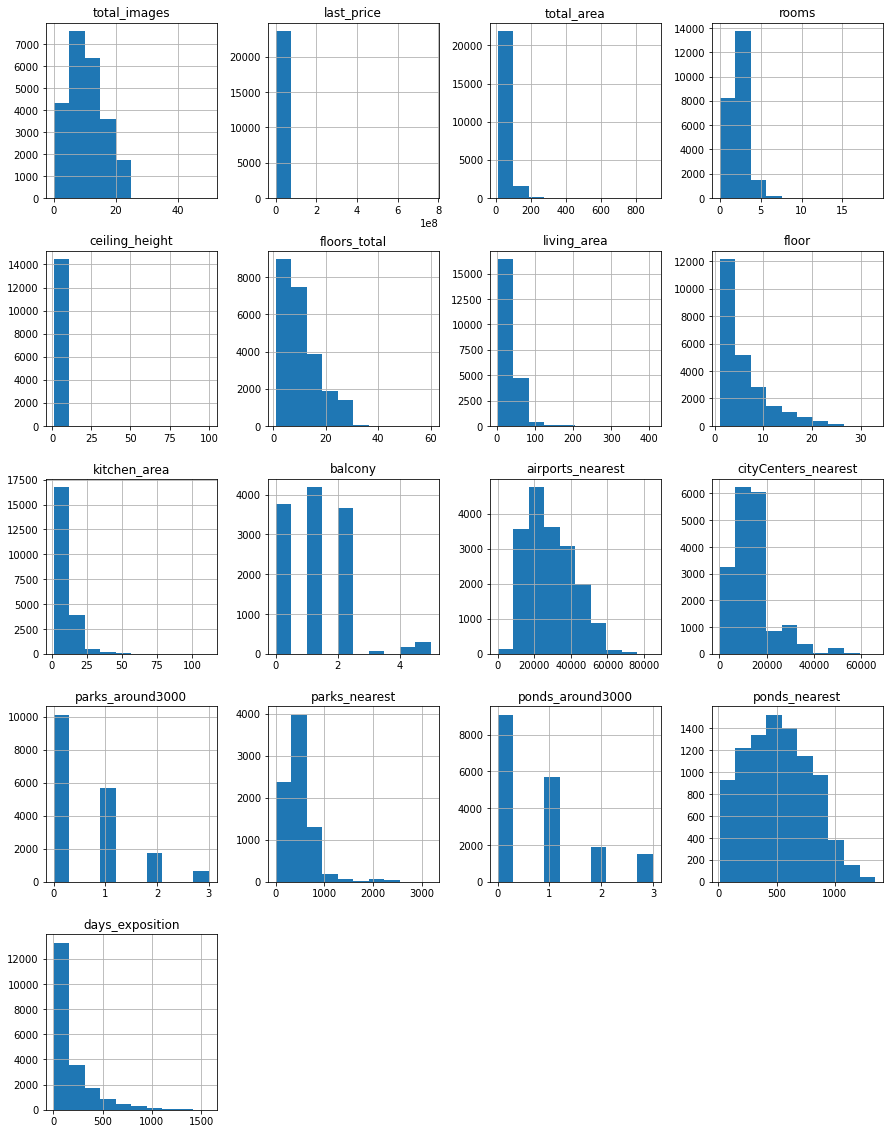

In [3]:
data.hist(figsize=(15,20))

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Предобработка данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Уточнил, что пропуски и правда есть, особенно напрягают значения, где больше 10к пропусков. Однако, скорее всего, они будут иметь значения 1 или 0 в зависимости от контекста

In [6]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                        'parks_around3000': 'parks_around_3000', 
                        'ponds_around3000': 'ponds_around_3000',
                        'studio': 'is_studio',
                        'open_plan': 'is_open_plan'
                       })
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Исправим типы данных и заполним пропуски

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [8]:
data['is_apartment'] = data['is_apartment'].astype(bool)

In [9]:
data['balcony'] = data['balcony'].fillna('0').astype(int)
data['balcony'].isna().sum()

0

С балконами разобрались, мы великолепны

In [10]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [11]:
ceiling_height_meadian = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_meadian)

<AxesSubplot:title={'center':'Доли пропущенных значений в процентах'}>

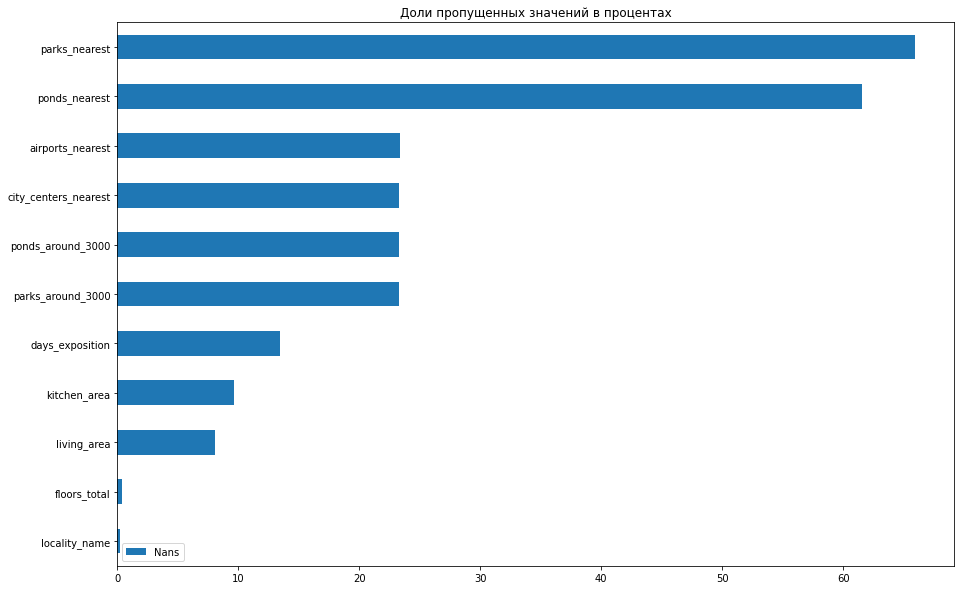

In [12]:
(
    (data.isna().mean()*100)
    .to_frame()
    .rename(columns={0:'Nans'})
    .query('Nans > 0')
    .sort_values(by='Nans', ascending=True)
    .plot(kind='barh', figsize=(15, 10), title='Доли пропущенных значений в процентах')
)

График по долям пропущенным значениям. Скорее всего NaN значит не то, что данных нет, а то, что кол-во = 0

In [13]:
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
is_studio                   0
is_open_plan                0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000        5500
parks_nearest           15535
ponds_around_3000        5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [14]:
len(data['locality_name'].unique())

364

Разберемся с поселками в СПб. Много типичных ошибок, типа перепущенных е и ё

In [15]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')
len(data['locality_name'].unique())

323

In [16]:
data.duplicated().sum()

0

явных дубликатов нет

In [17]:
print('Квартир стоимостью 0:', data.query('last_price == 0')['last_price'].count())
print('Очень дешевые квартиры 100.000:', data.query('last_price < 1e+05')['last_price'].count())
print('Сверхдорогие квартиры 100.000.000:', data.query('last_price > 1e+08')['last_price'].count())

print('Квартир стоимостью больше 100.000.000:', data.query('last_price > 1e+07')['last_price'].count())
data.drop(index=data.query('last_price > 1e+08').index,inplace=True)

Квартир стоимостью 0: 0
Очень дешевые квартиры 100.000: 1
Сверхдорогие квартиры 100.000.000: 37
Квартир стоимостью больше 100.000.000: 2698


избавился от аномально дорогих цен

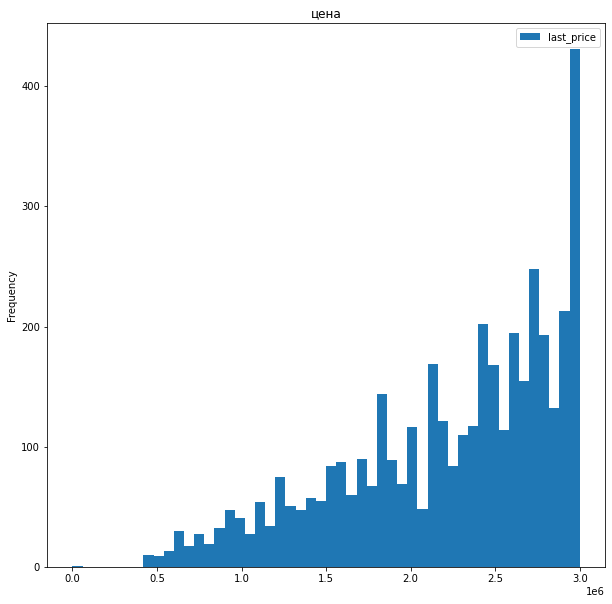

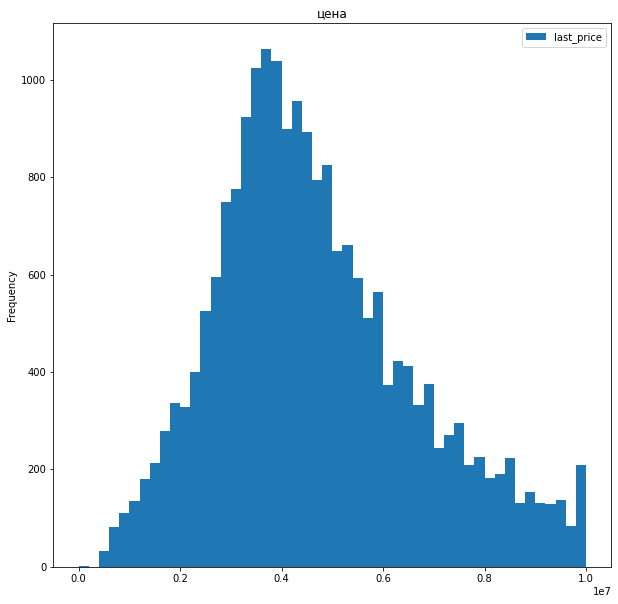

In [18]:
data.plot(y='last_price', kind='hist', bins=50, range=(0,3e+06), figsize=(10,10), title='цена')
data.plot(y='last_price', kind='hist', bins=50, range=(0,1e+07), figsize=(10, 10), title='цена')
data.drop(index=data.query('last_price < 1e+05').index,inplace=True)

<AxesSubplot:title={'center':'Площади квартир'}, ylabel='Frequency'>

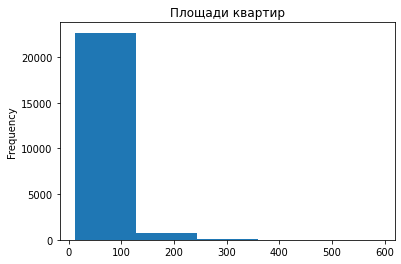

In [19]:
data['total_area'].plot(kind='hist', bins=5, title='Площади квартир')

Основное кол-во квартир < 100 кв.метров, что логично. Однако есть квартиры аж более 400м^2, а это много. Если это и не оишбки, то уж точно не типичные ситуации, избавимся от них

In [20]:
print('Менее 100 метров ->', data.query('total_area < 100')['total_area'].count())
print('Менее 25 метров ->', data.query('total_area < 25')['total_area'].count())
print('Менее 20 метров ->', data.query('total_area < 20')['total_area'].count())
print('Менее 15 метров ->', data.query('total_area < 15')['total_area'].count())
print('Менее 10 метров ->', data.query('total_area < 10')['total_area'].count())
print()

Менее 100 метров -> 21674
Менее 25 метров -> 186
Менее 20 метров -> 27
Менее 15 метров -> 6
Менее 10 метров -> 0



In [21]:
print('Более 400 метров ->', data.query('total_area > 400')['total_area'].count())

Более 400 метров -> 14


<AxesSubplot:title={'center':'Квартиры с площадью менее 400 м'}, ylabel='Frequency'>

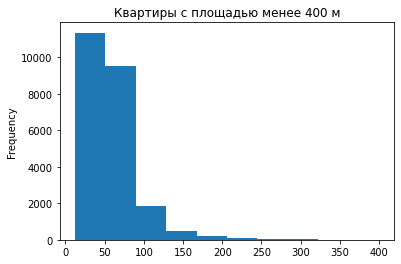

In [22]:
data.drop(index=data.query('total_area > 400').index, inplace=True)
data['total_area'].plot(kind='hist', title='Квартиры с площадью менее 400 м')

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

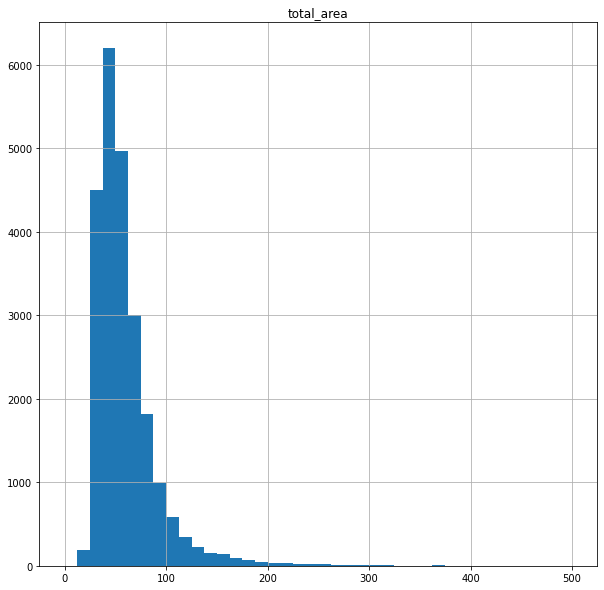

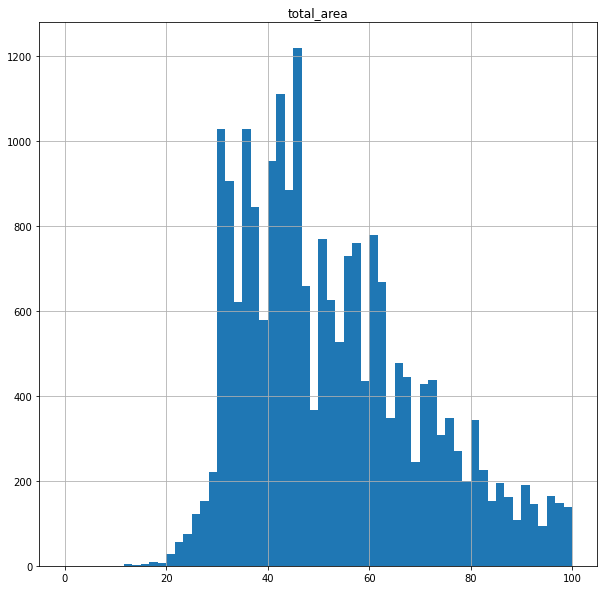

In [23]:
data.hist('total_area', bins=40, range=(0,500), figsize=(10, 10))
data.hist('total_area', bins=60, range=(0,100), figsize=(10, 10))

In [24]:
data['rooms'].describe()

count    23513.000000
mean         2.063369
std          1.063315
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

0 комнат и 19 очень интересные, надо обратить на них внимание

In [25]:
print('Объявлений где 0 комнат -> ', data.query('rooms == 0').count()['rooms'])
print('Объявлений где 0 комнат и апартаменты -> ', data.query('rooms == 0 and is_apartment').count()['rooms'])
print('Объявлений где 0 комнат и студия -> ', data.query('rooms == 0 and is_studio').count()['rooms'])
print('Объявлений где 0 комнат и свободная планировка -> ', data.query('rooms == 0 and is_open_plan').count()['rooms'])
print('Объявлений где 0 комнат и не студия, и не апартаменты -> ',       data.query('rooms == 0 and ~is_studio and ~is_apartment').count()['rooms'])

Объявлений где 0 комнат ->  194
Объявлений где 0 комнат и апартаменты ->  188
Объявлений где 0 комнат и студия ->  135
Объявлений где 0 комнат и свободная планировка ->  59
Объявлений где 0 комнат и не студия, и не апартаменты ->  1


In [26]:
print(data['ceiling_height'].count())
print('Объявлений где высота потолка 0 -> ', data.query('ceiling_height == 0').count()['ceiling_height'])
print('Объявлений где высота потолка ниже 2 метров -> ', data.query('ceiling_height < 2').count()['ceiling_height'])
print('Объявлений где высота потолка ниже 2.5 метров -> ', data.query('ceiling_height < 2.5').count()['ceiling_height'])
print('Объявлений где высота потолка выше 4 метров -> ', data.query('ceiling_height > 4').count()['ceiling_height'])

23513
Объявлений где высота потолка 0 ->  0
Объявлений где высота потолка ниже 2 метров ->  3
Объявлений где высота потолка ниже 2.5 метров ->  73
Объявлений где высота потолка выше 4 метров ->  68


потолки менее 2 метров не звучит, как адекватное значение

In [27]:
print('Объявлений где высота потолка выше 25 метров -> ', data.query('ceiling_height > 25').count()['ceiling_height'])
print('Объявлений где высота потолка выше 36 метров -> ', data.query('ceiling_height > 36').count()['ceiling_height'])
print('Объявлений где высота потолка выше 25 метров, но ниже 36 -> ',       data.query('25 < ceiling_height < 36').count()['ceiling_height'])

Объявлений где высота потолка выше 25 метров ->  13
Объявлений где высота потолка выше 36 метров ->  1
Объявлений где высота потолка выше 25 метров, но ниже 36 ->  12


скорее всего, все данные > 10 метров являются ошибочными. То есть 10 изначально планировалось как 1.0, 20 как 2.0 итд. Однако от некоторых все равно избавился

In [28]:
data.drop(index=data.query('ceiling_height > 7').index, inplace=True)
data['ceiling_height'].describe()

count    23484.000000
mean         2.695408
std          0.217322
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'высота потолков'}, ylabel='Frequency'>

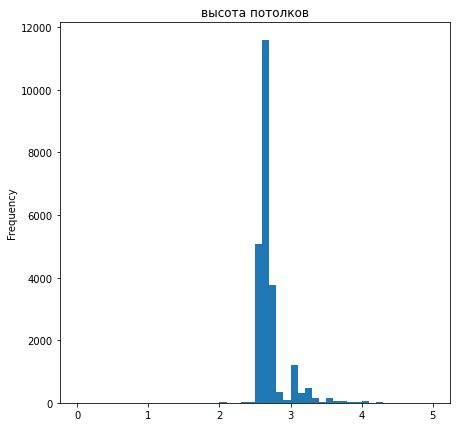

In [29]:
data['ceiling_height'].plot(kind='hist', title='высота потолков', bins=50, range=(0, 5), figsize=(7, 7))

In [30]:
print('Объявлений где высота потолка ниже 2.5 метров -> ', data.query('ceiling_height < 2.5').count()['ceiling_height'])

Объявлений где высота потолка ниже 2.5 метров ->  73


высота потолков не может быть <2.5 метров, поэтому дропаем

In [31]:
data.drop(index=data.query('ceiling_height < 2.5').index, inplace=True)

In [32]:
data['floors_total'].describe()

count    23411.000000
mean        10.693307
std          6.596725
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [33]:
data.query('floors_total < 2').count()['floors_total']
print('Количество квартир в доме с 1 этажом ->', data.query('floors_total == 1').count()['floors_total'])
print('Количество квартир в доме с более чем 20 этажами ->', data.query('floors_total > 20').count()['floors_total'])
print('Количество квартир в доме с более чем 25 этажами ->', data.query('floors_total > 25').count()['floors_total'])
print('Количество квартир в доме с более чем 30 этажами ->', data.query('floors_total > 30').count()['floors_total'])
print('Количество квартир в доме с более чем 40 этажами ->', data.query('floors_total > 40').count()['floors_total'])

Количество квартир в доме с 1 этажом -> 23
Количество квартир в доме с более чем 20 этажами -> 2666
Количество квартир в доме с более чем 25 этажами -> 340
Количество квартир в доме с более чем 30 этажами -> 30
Количество квартир в доме с более чем 40 этажами -> 2


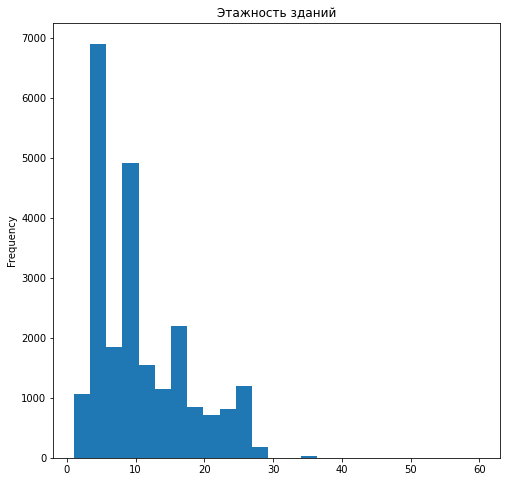

In [34]:
data['floors_total'].plot(kind='hist', title='Этажность зданий', bins=25, figsize=(8, 8))
data.drop(index=data.query('floors_total > 36').index, inplace=True)
print()

Основные здания - хрущевки (5 этажей) и Брежневки(9 этажей). Выглядит все логично

In [35]:
print(data['living_area'].describe())

count    21558.000000
mean        34.139702
std         20.392414
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        264.500000
Name: living_area, dtype: float64


In [36]:
print('Количество квартир метражом менее 20 метров -> ', data.query('living_area < 20').count()['living_area'])
print('Количество квартир метражом менее 15 метров -> ', data.query('living_area < 15').count()['living_area'])
print('Количество квартир метражом менее 10 метров -> ', data.query('living_area < 10').count()['living_area'])

Количество квартир метражом менее 20 метров ->  6183
Количество квартир метражом менее 15 метров ->  693
Количество квартир метражом менее 10 метров ->  25


Вряд ли квартиры с площадью менее 15м^2 правда существуют. Я надеюсь

In [37]:
data.drop(index=data.query('living_area < 15').index, inplace=True)

In [38]:
print('Количество квартир метражом более 150 метров -> ', data.query('living_area > 150').count()['living_area'])
data.drop(index=data.query('living_area > 150').index, inplace=True)

Количество квартир метражом более 150 метров ->  91


<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

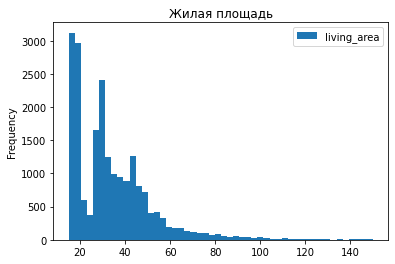

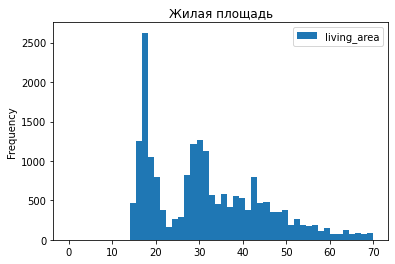

In [39]:
data.plot(kind='hist', y='living_area', title='Жилая площадь', bins=50)
data.plot(kind='hist', title='Жилая площадь', y='living_area', bins=50, range=(0, 70))

<AxesSubplot:title={'center':'Этаж квартиры'}, ylabel='Frequency'>

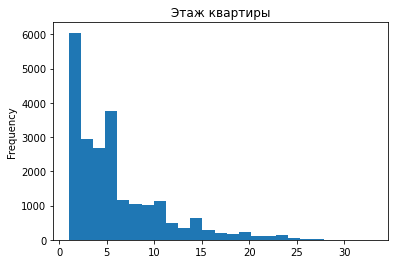

In [40]:
data['floor'].describe()
data['floor'].plot(kind='hist', title='Этаж квартиры', bins=25)

count    20490.000000
mean        10.410285
std          5.536625
min          1.300000
25%          7.000000
50%          9.000000
75%         11.945000
max        107.000000
Name: kitchen_area, dtype: float64


<AxesSubplot:title={'center':'Плоащдь кухни'}, ylabel='Frequency'>

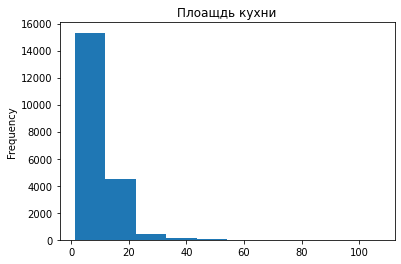

In [41]:
print(data['kitchen_area'].describe())
data['kitchen_area'].plot(kind='hist', title='Плоащдь кухни')

In [42]:
print('Кухни менее 15 метров ->', data.query('kitchen_area < 15').count()['kitchen_area']) # Видимо стандартный размер
print('Кухни менее 10 метров ->', data.query('kitchen_area < 10').count()['kitchen_area'])
print('Кухни менее 8 метров ->', data.query('kitchen_area < 8').count()['kitchen_area']) # а это уже ниже минимума по СНИП
print('Кухни менее 5 метров ->', data.query('kitchen_area < 5').count()['kitchen_area']) # меньше 5 метров в 91 квартире
print('Кухни более 40 метров ->', data.query('kitchen_area > 40').count()['kitchen_area'])

Кухни менее 15 метров -> 18022
Кухни менее 10 метров -> 11291
Кухни менее 8 метров -> 6411
Кухни менее 5 метров -> 93
Кухни более 40 метров -> 102


Чаще всего кухни маленькие, однако не менее 5 м^2, но вряд ли и более 40. Дропаем

In [43]:
data.drop(index=data.query(' kitchen_area < 5').index, inplace=True)
data.drop(index=data.query(' kitchen_area > 40').index, inplace=True)

<AxesSubplot:title={'center':'Плоащдь кухни'}, ylabel='Frequency'>

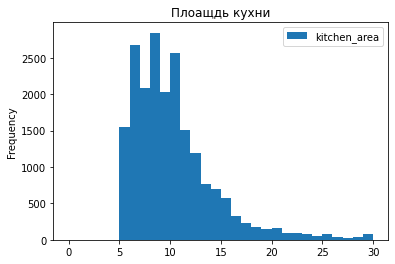

In [44]:
data.plot(y='kitchen_area', kind='hist', bins=30, range=(0, 30), title='Плоащдь кухни')

count    22430.000000
mean         0.594427
std          0.963221
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64


<AxesSubplot:title={'center':'Балконы'}, ylabel='Frequency'>

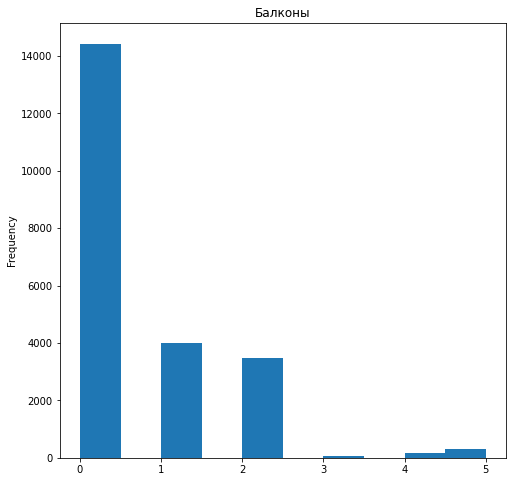

In [45]:
print(data['balcony'].describe())
data['balcony'].plot(kind='hist', bins=10, figsize=(8, 8), title='Балконы')

count    19413.000000
mean       180.632875
std        219.486391
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


<AxesSubplot:title={'center':'Сколько дней прошло до продажи'}, ylabel='Frequency'>

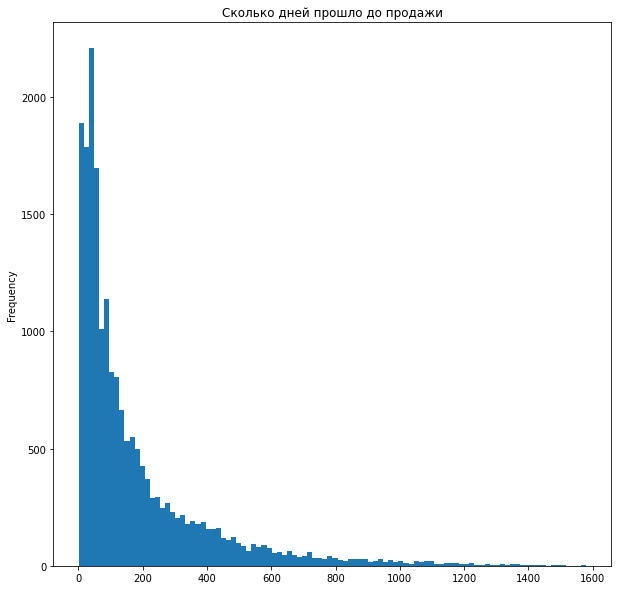

In [46]:
print(data['days_exposition'].describe())
data['days_exposition'].plot(kind='hist', bins=100, figsize=(10, 10), title='Сколько дней прошло до продажи')

In [47]:
data.drop(index=data.query('days_exposition > 365*2').index, inplace=True)

Очень мало квартир, которые не могут продать за 2 года, удалю их

count    16646.000000
mean     28795.557311
std      12652.426910
min          0.000000
25%      18459.750000
50%      26866.500000
75%      37288.000000
max      84853.000000
Name: airports_nearest, dtype: float64


<AxesSubplot:title={'center':'Ближайший аэропорт'}, ylabel='Frequency'>

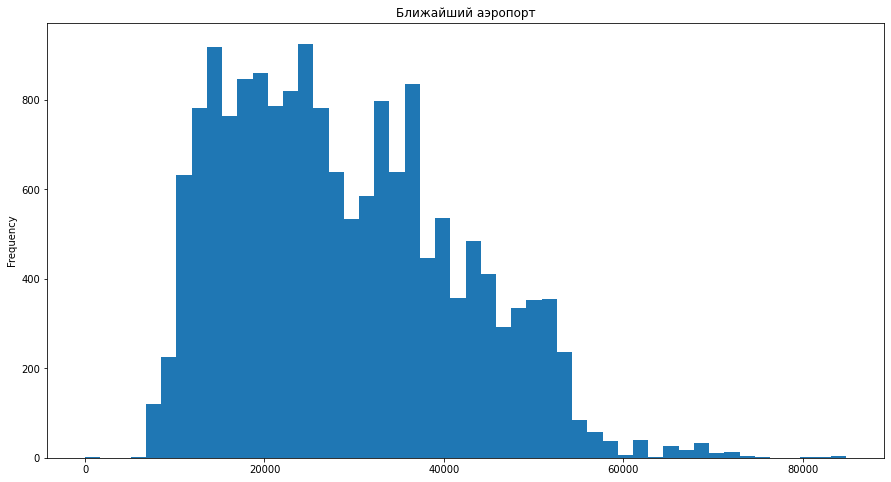

In [48]:
print(data['airports_nearest'].describe())
data['airports_nearest'].plot(kind='hist', bins=50, figsize=(15, 8), title='Ближайший аэропорт')

In [49]:
data.query('airports_nearest < 10000').count()['airports_nearest']

282

In [50]:
data.drop(index=data.query('airports_nearest < 10000').index, inplace=True)

### Посчитайте и добавьте в таблицу новые столбцы

In [51]:
data['one_sqr_m_price'] = data['last_price'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,one_sqr_m_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,NaN,22,True,...,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737


Цена за 1 м^2

In [52]:
data.info()
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21434 entries, 0 to 23697
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21434 non-null  int64         
 1   last_price            21434 non-null  float64       
 2   total_area            21434 non-null  float64       
 3   first_day_exposition  21434 non-null  datetime64[ns]
 4   rooms                 21434 non-null  int64         
 5   ceiling_height        21434 non-null  float64       
 6   floors_total          21434 non-null  float64       
 7   living_area           19659 non-null  float64       
 8   floor                 21434 non-null  int64         
 9   is_apartment          21434 non-null  bool          
 10  is_studio             21434 non-null  bool          
 11  is_open_plan          21434 non-null  bool          
 12  kitchen_area          19378 non-null  float64       
 13  balcony         

Более подробно про даты

In [53]:
data['floor_type'] = data.apply(
    lambda x: 'первый' if (x.floor == 1)
    else ('последний' if (x.floor == x.floors_total)
    else 'другой'), axis=1
)

data['floor_type_number'] = data.apply(
    lambda x: 0 if (x.floor == 1) 
    else (2 if (x.floor == x.floors_total)
    else 1), axis=1
)

Добавил типы этажей

In [54]:
print(data['floor_type'].value_counts())
print(data['floor_type_number'].value_counts())

другой       15742
последний     3021
первый        2671
Name: floor_type, dtype: int64
1    15742
2     3021
0     2671
Name: floor_type_number, dtype: int64


In [55]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,one_sqr_m_price,day_of_week,month,year,floor_type,floor_type_number,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,1,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,True,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,1,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,1,7.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,NaN,22,True,...,0.0,NaN,NaN,110544.692737,3,4,2019,другой,1,12.0


Расстояние в км от центра города

### Проведите исследовательский анализ данных

<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

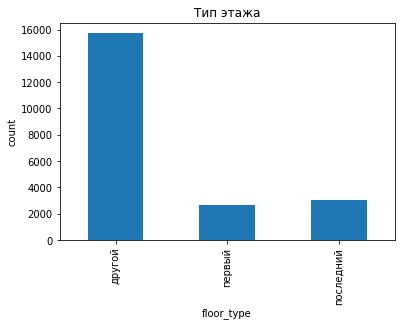

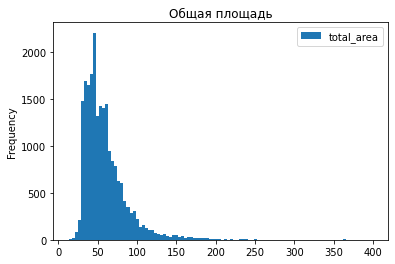

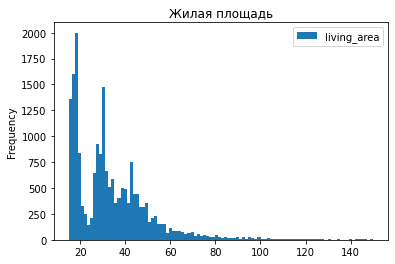

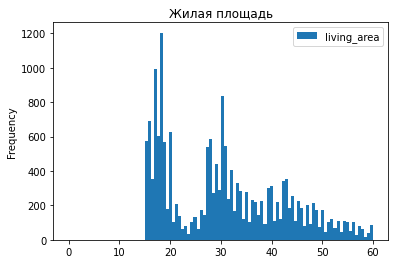

In [56]:
data.groupby(by='floor_type')['floor_type'].count().plot(kind='bar', ylabel = 'count', title='Тип этажа')
data.plot(y='total_area', kind='hist', bins = 100, title='Общая площадь')
data.plot(y='living_area', kind='hist', bins = 100, title='Жилая площадь')
data.plot(y='living_area', kind='hist', bins = 100, title='Жилая площадь', range=(0, 60))

Большинство квартир находится между первым и последними этажами. Логично
Большинство площадей находится между 35 и 70 м^2, что логично
Странно, что есть большие провалы, где жилая площадь между 20 и 30 м^2

<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

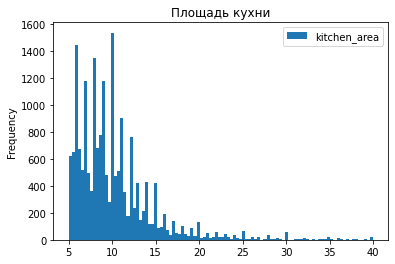

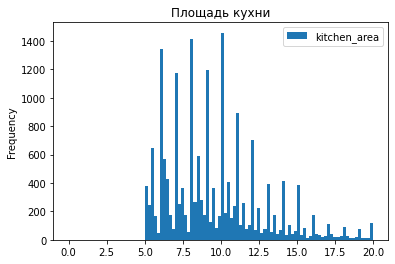

In [57]:
data.plot(y='kitchen_area', kind='hist', bins=100, title='Площадь кухни')
data.plot(y='kitchen_area', kind='hist', bins=100, title='Площадь кухни', range=(0,20))

Все выглядит логично. Есть огромные пики на опредленных площадях, скорее всего это стандратная планировка, было бы неплохо добавить такой столбец

<AxesSubplot:title={'center':'Последняя цена (модифицированная)'}, ylabel='Frequency'>

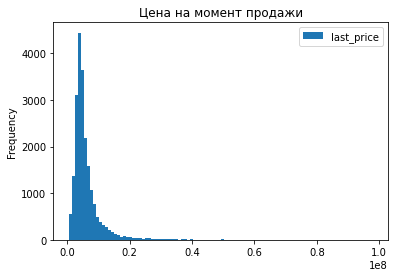

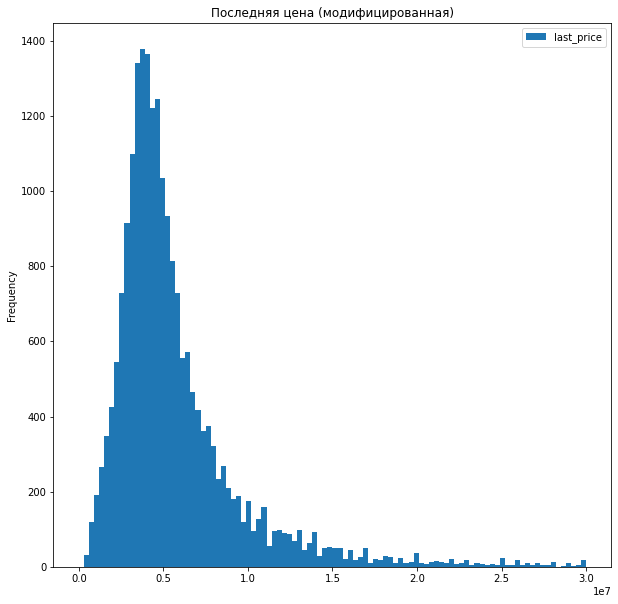

In [58]:
data.plot(y='last_price', kind='hist', bins=100, title='Цена на момент продажи')
data.plot(y='last_price',kind='hist', bins=100, range=(0,3e+07), figsize=(10, 10), title='Последняя цена (модифицированная)')

Все выглядит логично, Похоже на нормальное распределние

<AxesSubplot:title={'center':'Комнаты'}, ylabel='Frequency'>

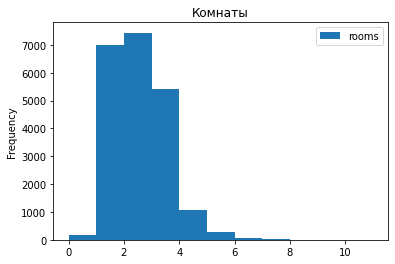

In [59]:
data.plot(y='rooms', kind='hist', bins=data['rooms'].max(), title='Комнаты')

Большинство домов имеют 1-3 комнаты, что соответсвует действительности. > 3 кмонат - элитное жилье

<AxesSubplot:title={'center':'Высота потолков'}, ylabel='Frequency'>

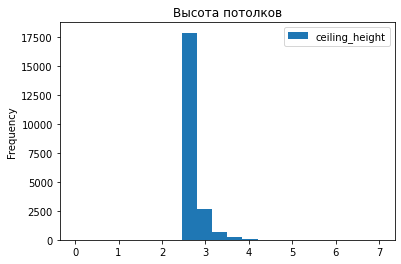

In [60]:
data.plot(y='ceiling_height', kind='hist', bins=20, range=(0, 7), title='Высота потолков')

<AxesSubplot:title={'center':'Этаж'}, ylabel='Frequency'>

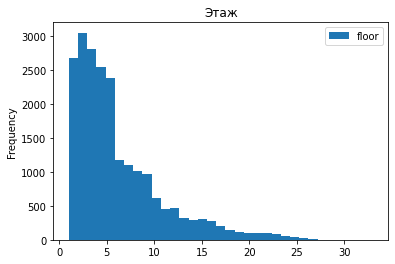

In [61]:
data.plot(y='floor', kind='hist', bins=data['floor'].max(), title='Этаж')

Данные выглядят корректными. Похоже на распредление Пуассона, не знаю, уместно ли здесь это. У нас распространены 5 и 9 этажные, а продают чаще всего где то в середине здания, отсюда и самые распространенные этажи между 3 и 5

<AxesSubplot:title={'center':'Всего этажей (модифицированный)'}, ylabel='Frequency'>

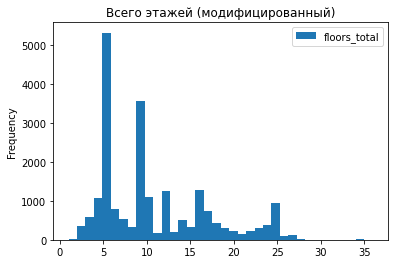

In [62]:
data.plot(y='floors_total', kind='hist', bins=round(data['floors_total'].max()), title='Всего этажей (модифицированный)')

<AxesSubplot:title={'center':'Ближайший парк'}, ylabel='Frequency'>

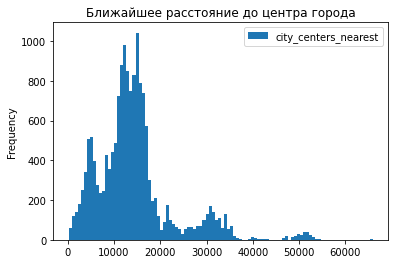

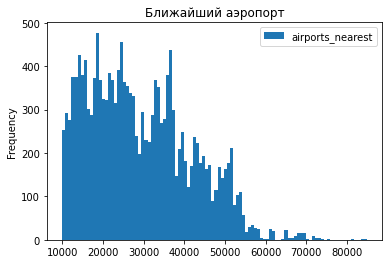

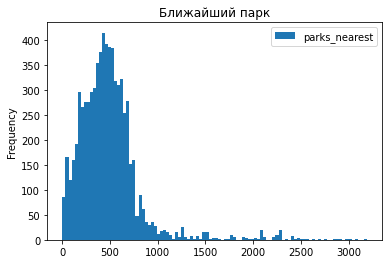

In [63]:
data.plot(y='city_centers_nearest', kind='hist', bins=100, title='Ближайшее расстояние до центра города')
data.plot(y='airports_nearest', kind='hist', bins=100, title='Ближайший аэропорт')
data.plot(y='parks_nearest', kind='hist', bins=100, title='Ближайший парк')

Все выглядит логично. Нет каких-то выдающихся выбросов или интересных фактов

<AxesSubplot:title={'center':'Год'}, ylabel='Frequency'>

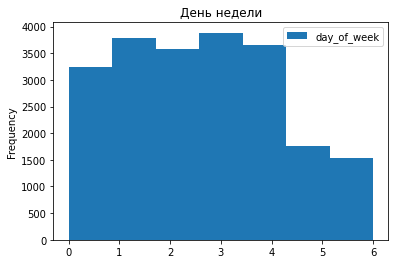

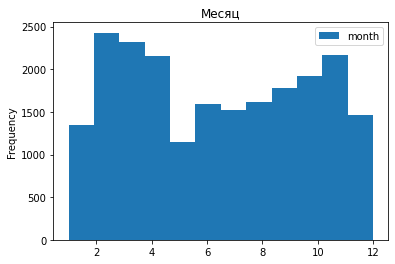

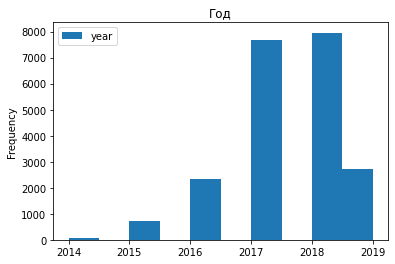

In [64]:
data.plot(y='day_of_week', kind='hist', bins=7, title='День недели')
data.plot(y='month', kind='hist', title='Месяц', bins=12)
data.plot(y='year', kind='hist', title='Год')

Чазе всего продавать квартиры стали после 2017. Скорее всего это связано с тем, что продажа квартир через интернет стала более популярной после 17 года. Еще это связано с тем, что квартиры не висят так долго на сайте.
Видим провал в публикации объявлений в субботу и воскресенье, видимо объявления публикуют преимущественно в будни. Так же видим что с февраля по апрель наблюдалосась повышенная активность.

<AxesSubplot:title={'center':'Дней до момента продажи'}, ylabel='Frequency'>

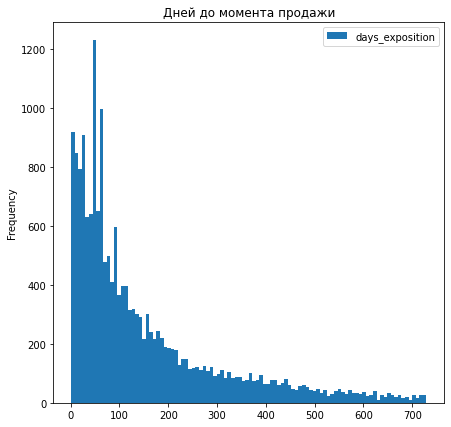

In [65]:
data.plot(y='days_exposition', kind='hist', bins=100, figsize=(7, 7), title='Дней до момента продажи')

In [66]:
print(data['days_exposition'].describe())

count    18450.000000
mean       150.606829
std        155.772589
min          1.000000
25%         44.000000
50%         90.000000
75%        206.000000
max        729.000000
Name: days_exposition, dtype: float64


Чаще всего квартиры продают меньше, чем за год

<AxesSubplot:title={'center':'Дней до момента продажи (модифицированные)'}, ylabel='Frequency'>

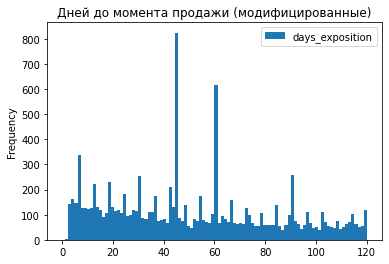

In [67]:
data.plot(y='days_exposition', kind='hist', title='Дней до момента продажи (модифицированные)', bins=100, range=(0, 120))

In [68]:
factors = ['total_area',
           'living_area',
           'kitchen_area',
           'rooms',
           'floor_type_number'
           ]

for f in factors:
    data_correlation = data['last_price'].corr(data[f])
    print(f'Зависимость цены от фактора {f} -> {data_correlation:0.2%}')

Зависимость цены от фактора total_area -> 74.56%
Зависимость цены от фактора living_area -> 64.80%
Зависимость цены от фактора kitchen_area -> 54.98%
Зависимость цены от фактора rooms -> 44.66%
Зависимость цены от фактора floor_type_number -> 5.38%


Как и ожидалось, цена по большей части зависит от площади

<AxesSubplot:title={'center':'Зависимость цены от площади кухни'}, xlabel='last_price', ylabel='kitchen_area'>

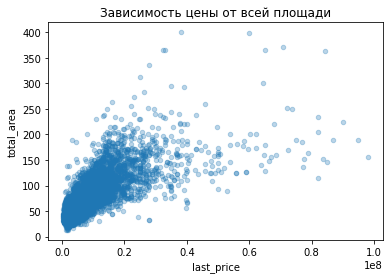

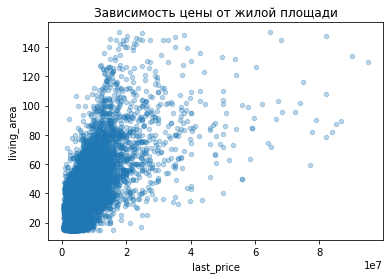

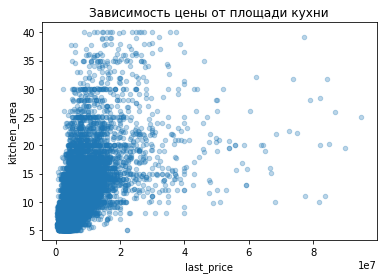

In [69]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3, title='Зависимость цены от всей площади')
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3, title='Зависимость цены от жилой площади')
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3, title='Зависимость цены от площади кухни')

Видно взаимосвязь между площадью и ценой, однако чем дороже квартиры, тем меньше взаимосвязи

<AxesSubplot:title={'center':'Медианная цена от дня недели выставления'}, xlabel='day_of_week'>

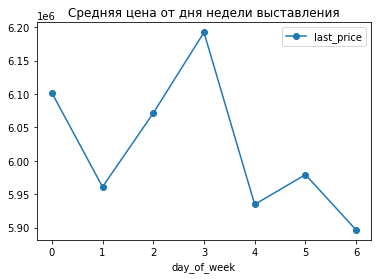

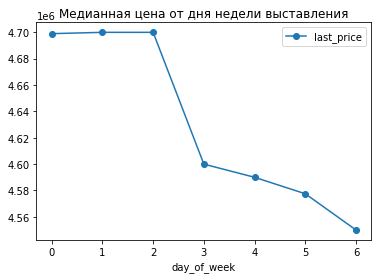

In [70]:
(
    data.pivot_table(index='day_of_week',
                     values='last_price', 
                     aggfunc='mean')
    .plot(y='last_price' 
          ,kind='line', 
          style='o-', 
          title='Средняя цена от дня недели выставления')
)
(
    data.pivot_table(index='day_of_week',
                     values='last_price', 
                     aggfunc='median')
    .plot(y='last_price' 
          ,kind='line', 
          style='o-', 
          title='Медианная цена от дня недели выставления')
)

<AxesSubplot:title={'center':'Медианная цена от месяца выставления'}, xlabel='month'>

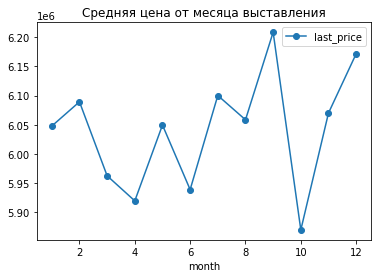

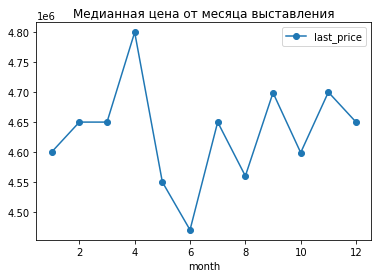

In [71]:
(
    data.pivot_table(index='month',
                     values='last_price', 
                     aggfunc='mean')
    .plot(y='last_price' 
          ,kind='line', 
          style='o-', 
          title='Средняя цена от месяца выставления')
)
(
    data.pivot_table(index='month',
                     values='last_price', 
                     aggfunc='median')
    .plot(y='last_price' 
          ,kind='line', 
          style='o-', 
          title='Медианная цена от месяца выставления')
)

<AxesSubplot:title={'center':'Медианная цена от года выставления'}, xlabel='year'>

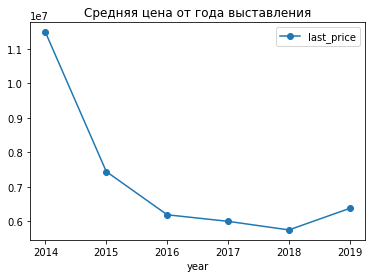

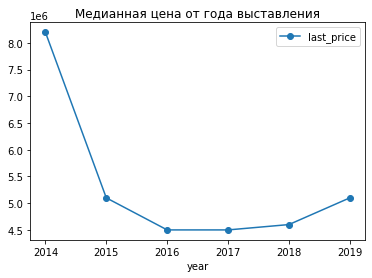

In [72]:
(
    data.pivot_table(index='year',
                     values='last_price', 
                     aggfunc='mean')
    .plot(y='last_price' 
          ,kind='line', 
          style='o-', 
          title='Средняя цена от года выставления')
)
(
    data.pivot_table(index='year',
                     values='last_price', 
                     aggfunc='median')
    .plot(y='last_price' 
          ,kind='line', 
          style='o-', 
          title='Медианная цена от года выставления')
)

,count,price_m2
locality_name,,
санкт-петербург,14195,112334.964259
поселок мурино,462,84516.377546
поселок шушары,387,76964.909843
всеволожск,364,68777.188363
пушкин,333,102817.622757
колпино,324,75061.428870
гатчина,284,69267.028931
поселок парголово,270,88050.546007
деревня кудрово,264,92321.574392


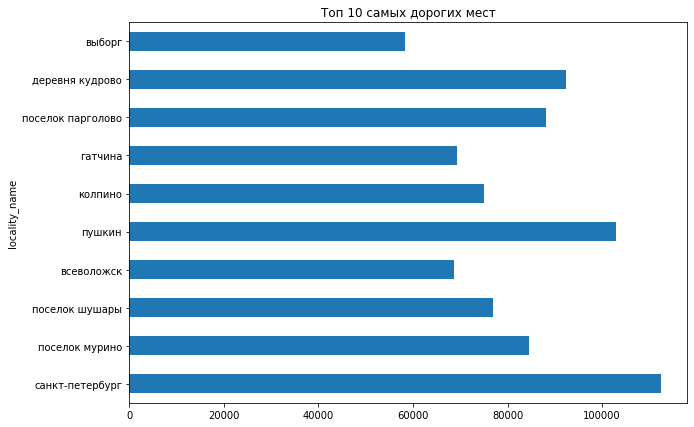

In [73]:
stat_grouped = data.pivot_table(
    index='locality_name', values='one_sqr_m_price', aggfunc=['count', 'mean'])

stat_grouped.columns = ['count', 'price_m2']
stat_grouped.sort_values(by='count', ascending=False, inplace=True)
stat_grouped = stat_grouped.iloc[:10]
stat_grouped['price_m2'].plot(kind='barh', figsize=(10, 7), title='Топ 10 самых дорогих мест')
stat_grouped

Самая дорогая и популярная жил.площадь в СПБ, самая дешевая в Выборге

<AxesSubplot:title={'center':'Цена киллометра при отдалении от центра'}, xlabel='city_centers_nearest_km'>

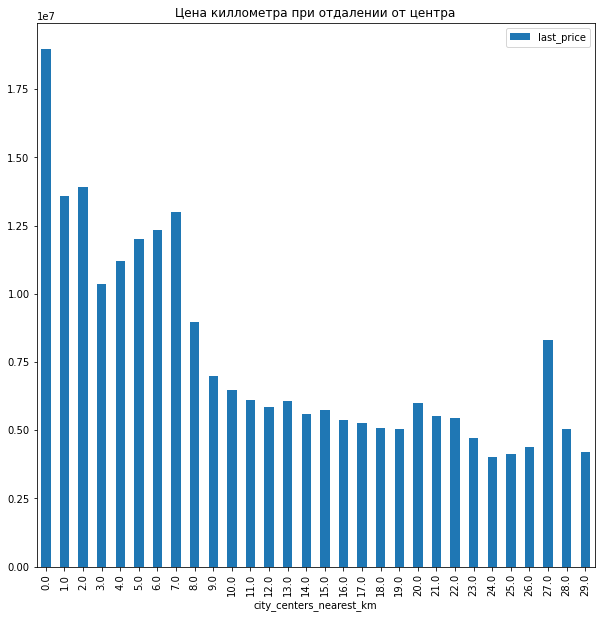

In [74]:
(
    data[data['locality_name']=='санкт-петербург']
    .pivot_table(
        index='city_centers_nearest_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='bar', figsize=(10, 10), title='Цена киллометра при отдалении от центра')
)

Радиус в 8 км от центра является центром города, цена в нем очень высокая. Далее идет явное снижение цены с пиком на 27 км, возможно там находится какой то элитный поселок

### Общий вывод

1. Выбросы сильно влияют на ситуацию, от них надо избавляться. Изначально было очень много грязных данных, пришлось менять типы данных, изменять названия столбцов

2. Самые дорогие места, помимо СПБ:
    Пушкин, Парголово и Кудрово
3. На цену квартиры влияет площадь и удаленность от центра города. Кол-во этажей на цену почти не влияет. Обычно, квартиры продаются быстрее, чем за год. В среднем, около 200 дней
4. Быстрая продажа считается < 90 дней, медленно - более 200 дней


В СПБ жилье дороже, чем в области, а в центре СПБ дороже, чем на окраине. Я бы рекоммендовал добавить больше обязательных полей для заполнения, чтобы данные были чище. Цена, вроде как, не зависит от дня недели и месяца. Добавил бы новые столбцы, такие как наличие ремонта, было ли изменение в планировке и т.д

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод